In [1]:
import random
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
class Perceptron:
    def __init__(self, n):
        self.weights = [0] * n
        self.lr = 0.1                               # learning rate
        for w in range(len(self.weights)):
            self.weights[w] = random.uniform(-1, 1)

    def guess(self, inputs):
        sum1 = 0
        for i in range(len(inputs)):
            sum1 += inputs[i] * self.weights[i]
 
        output = 1 if sum1 > 0 else -1                # activation function
        return output
    
    def guessY(self, x):
        w0 = self.weights[0]
        w1 = self.weights[1]
        w2 = self.weights[2]
        return -(w2/w1) - (w0/w1)* x
        
    def train(self, inputs, target):
        guess = self.guess(inputs)
        error = target - guess
        
        # Tuning the weights
        for i in range(len(self.weights)):
            self.weights[i] += error * inputs[i] * self.lr

In [3]:
def f(x):
    return 0.3*x + 0.2

class Point:
    def __init__(self, x=None, y=None):
        self.bias = 1
        if x == None and y == None:
            self.x = random.uniform(-1, 1)
            self.y = random.uniform(-1, 1)
        else:
            self.x = x
            self.y = y
            
        lineY = f(self.x)
        
        if self.y > lineY:
            self.label = 1
        else:
            self.label = -1
            
    def pixelX(self):                                   # returns the pixel value of x
        return np.interp(self.x, [-1, 1], [0,400])     
    
    def pixelY(self):                                   # returns the pixel value of y
        return np.interp(self.y, [-1, 1], [0,400])

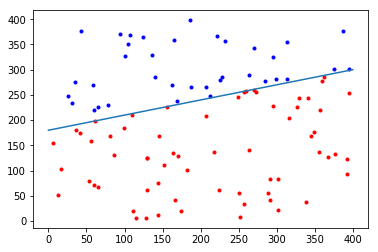

In [4]:
points = [Point() for _ in range(100)]

for pt in points:
    if pt.label == 1:
        color = 'b'
    else:
        color = 'r'
        
    plt.plot(pt.pixelX(), pt.pixelY(), marker='o', markersize=3, color=color)
    
p2 = Point(-1, f(-1))
p3 = Point(1, f(1))

plt.plot([p2.pixelX(), p3.pixelX()], [p2.pixelY(), p3.pixelY()])
plt.show()

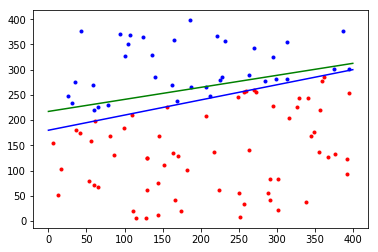

In [5]:
# readjusting the weights, using gradient descent
# w = w + deltaw
# deltaw = error*input
# new weight = weight*error*input*learning_rate
# we need a bias to correct for the (0,0) case

#the green dots represent the points we got right and the red represent the points we got wrong

p = Perceptron(3)
for pt in points:
    inputs = pt.x, pt.y, pt.bias
    target = pt.label
    p.train(inputs, pt.label)
    guess = p.guess(inputs)
    if target == 1:
        plt.plot(pt.pixelX(), pt.pixelY(), marker='o', markersize=3, color='b')
    else:
        plt.plot(pt.pixelX(), pt.pixelY(), marker='o', markersize=3, color='r')

# nnets are good universal function approximators 
p4 = Point(-1, p.guessY(-1))
p5 = Point(1, p.guessY(1))   
        
# green represents the perceptrons line and blue represents the actual line
plt.plot([p2.pixelX(), p3.pixelX()], [p2.pixelY(), p3.pixelY()], color='b')
plt.plot([p4.pixelX(), p5.pixelX()], [p4.pixelY(), p5.pixelY()], color='g')

plt.show()

In [6]:
# multilayer perceptrons allow for modelling non-linear relationships, because you can link multiple statements together
# while single layer perceptrons only allow for modelling linear relationships
# scale the inputs to the neural net into a range
# store the weights as a matrix 
# 